### Run writeInt-K.py N number of times for gclass=2 and plot results

In [14]:
import subprocess
import shutil
import os
from astropy.io import ascii
import matplotlib.pyplot as plt

# Configuration
n_runs = 2
output_dir = '../data/'
base_output = 'int_K_nq4_nbs500_700controlclass2.npz'  # Expected output filename from writeInt-K.py

# Run writeInt-K.py multiple times and archive results
for i in range(n_runs):
    print(f'Run {i+1}/{n_runs}')
    # Execute the script
    subprocess.run(['python', 'writeInt-K.py'], check=True)
    
    # Archive the output file
    src = os.path.join(output_dir, base_output)
    dst = os.path.join(output_dir, f'int_K_nq4_nbs500_700controlclass2_run_{i}.npz')
    if os.path.exists(src):
        shutil.copy(src, dst)
        print('Copying to', dst)
    else:
        raise FileNotFoundError(f'File not found: {src}')


Run 1/2
Reading files
Sample file: ../data/VLS_ang5_cz_700control.txt
Save correlation plots to: ../plots/cross_treecorr_nq4_nmult15_nbs500_700controlclass2.png
Save results to: ../data/int_K_nq4_nbs500_700controlclass2.npz
Calculating crosscorrelations
1/4
2/4
3/4
4/4
Plotting correlations
Integration
Writing results in: ../data/int_K_nq4_nbs500_700controlclass2.npz
Copying to ../data/int_K_nq4_nbs500_700controlclass2_run_0.npz
Run 2/2
Reading files
Sample file: ../data/VLS_ang5_cz_700control.txt
Save correlation plots to: ../plots/cross_treecorr_nq4_nmult15_nbs500_700controlclass2.png
Save results to: ../data/int_K_nq4_nbs500_700controlclass2.npz
Calculating crosscorrelations
1/4
2/4
3/4
4/4
Plotting correlations
Integration
Writing results in: ../data/int_K_nq4_nbs500_700controlclass2.npz
Copying to ../data/int_K_nq4_nbs500_700controlclass2_run_1.npz


/tmp/ipykernel_20217/3908089268.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best', ncol=2)


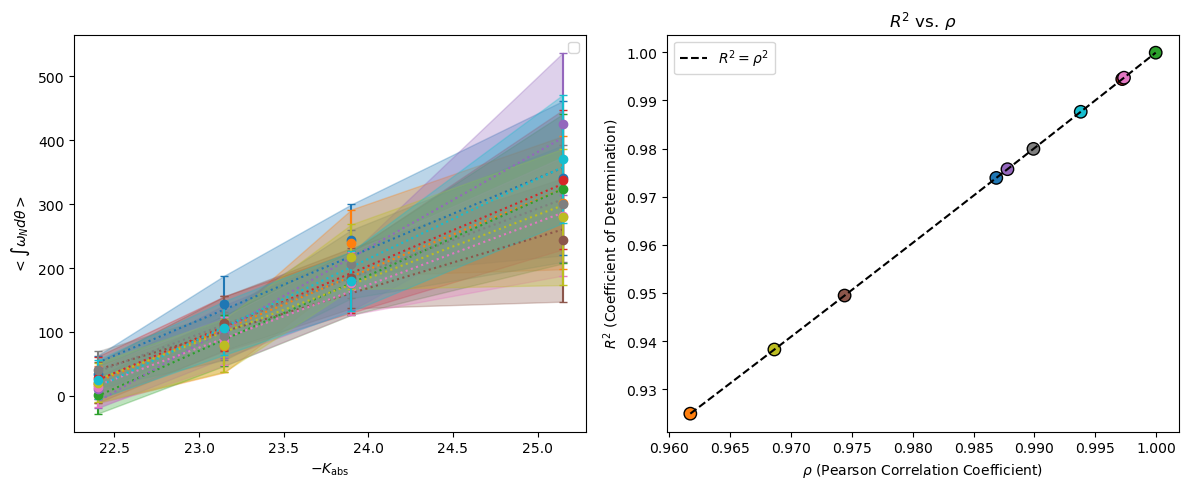

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from scipy import stats

nquant = 4
nbootstrap = 500
#sample = '700controlw1.5-3.3class2'
N = 10  # Number of runs

# Create 1x2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = [f'C{i:02d}' for i in range(N)]

# Lists to store R² and Pearson's r values
all_r_squared = []
all_rho = []

for i, color in zip(range(N), colors):
    filename = f'../data/int_K_nq4_nbs500_700controlclass2_run_{i}.npz'
    data = ascii.read(filename)
    
    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']
    
    # Compute regression and correlation
    res = stats.linregress(-meanMag, int_mean)
    pearsonr, p_value = stats.pearsonr(-meanMag, int_mean)
    
    # Store R² and rho
    r_squared = res.rvalue ** 2
    all_r_squared.append(r_squared)
    all_rho.append(pearsonr)
    
    # Plot regression line and error bars on ax1
    ax1.plot(-meanMag, res.intercept - res.slope * meanMag, ls=':', c=color)
    ax1.errorbar(-meanMag, int_mean, yerr=int_std, c=color, fmt='o', capsize=3)
    ax1.fill_between(-meanMag, int_mean - int_std, int_mean + int_std, 
                     color=color, alpha=0.3)

# Configure ax1 (original plot)
ax1.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax1.set_xlabel(r'$-K_{\mathrm{abs}}$')
ax1.legend(loc='best', ncol=2)

# Plot R² vs. Pearson's rho on ax2
ax2.scatter(all_rho, all_r_squared, c=colors, edgecolors='k', s=80)
ax2.set_xlabel(r'$\rho$ (Pearson Correlation Coefficient)')
ax2.set_ylabel(r'$R^2$ (Coefficient of Determination)')
ax2.set_title(r'$R^2$ vs. $\rho$')

# Add reference line: R² = ρ² (expected for simple linear regression)
rho_grid = np.linspace(min(all_rho), max(all_rho), 100)
ax2.plot(rho_grid, rho_grid**2, 'k--', label=r'$R^2 = \rho^2$')
ax2.legend(loc='best')

plt.tight_layout()
plt.savefig(f'../plots/test_class2Variance_R2_vs_rho.png')
plt.show()

### Recreate test with new sample of more passive galaxies  

In [9]:
import subprocess
import shutil
import os
from astropy.io import ascii
import matplotlib.pyplot as plt

# Configuration
n_runs = 10
nbs = 500
sample = '700control-w1.5-3.3class2'
output_dir = '../data/'
base_output = f'int_K_nq4_nbs{nbs}_{sample}.npz'  # Expected output filename from writeInt-K.py

# Run writeInt-K.py multiple times and archive results
for i in range(n_runs):
    print(f'Run {i+1}/{n_runs}')
    # Execute the script
    subprocess.run(['python', 'writeInt-K.py'], check=True)
    
    # Archive the output file
    src = os.path.join(output_dir, base_output)
    dst = os.path.join(output_dir, f'int_K_nq4_nbs{nbs}_{sample}_run_{i}.npz')
    if os.path.exists(src):
        shutil.copy(src, dst)
        print('Copying to', dst)
    else:
        raise FileNotFoundError(f"File not found: {src}")
        

Run 1/10
Reading files
Sample file: ../data/VLS_1.5-3.3_control.txt
Save correlation plots to: ../plots/cross_treecorr_nq4_nmult15_nbs500_700control-w1.5-3.3class2.png
Save results to: ../data/int_K_nq4_nbs500_700control-w1.5-3.3class2.npz
Calculating crosscorrelations
1/4
2/4
3/4
4/4
Plotting correlations
Integration
Writing results in: ../data/int_K_nq4_nbs500_700control-w1.5-3.3class2.npz
Copying to ../data/int_K_nq4_nbs500_700control-w1.5-3.3class2_run_0.npz
Run 2/10
Reading files
Sample file: ../data/VLS_1.5-3.3_control.txt
Save correlation plots to: ../plots/cross_treecorr_nq4_nmult15_nbs500_700control-w1.5-3.3class2.png
Save results to: ../data/int_K_nq4_nbs500_700control-w1.5-3.3class2.npz
Calculating crosscorrelations
1/4
2/4
3/4
4/4
Plotting correlations
Integration
Writing results in: ../data/int_K_nq4_nbs500_700control-w1.5-3.3class2.npz
Copying to ../data/int_K_nq4_nbs500_700control-w1.5-3.3class2_run_1.npz
Run 3/10
Reading files
Sample file: ../data/VLS_1.5-3.3_control.tx

/tmp/ipykernel_4800/3506432762.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best', ncol=2)


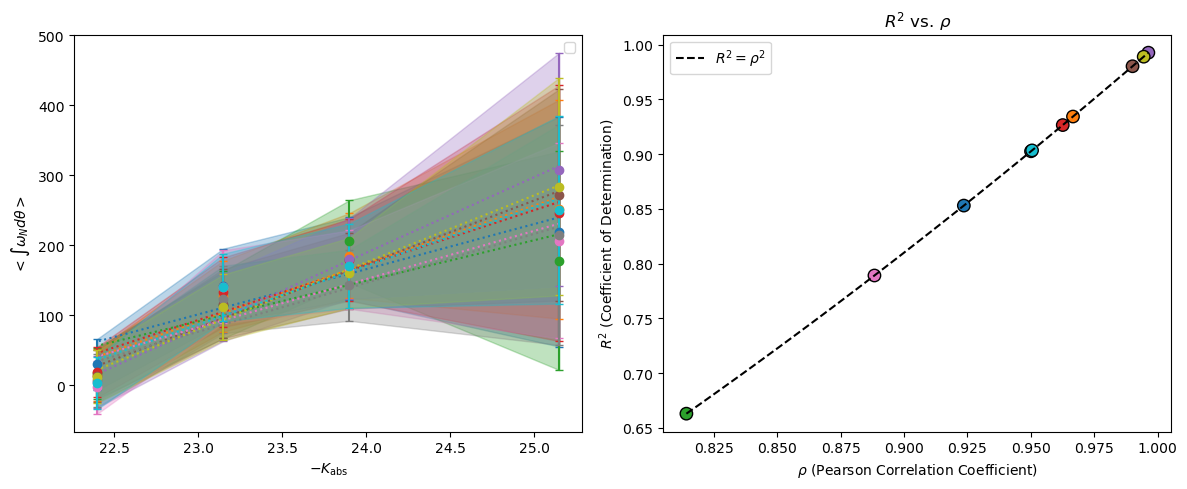

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from scipy import stats

#nquant = 4
#nbootstrap = 500
sample = '700control-w1.5-3.3class2'
N = 10  # Number of runs

# Create 1x2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = [f'C{i:02d}' for i in range(N)]

# Lists to store R² and Pearson's r values
all_r_squared = []
all_rho = []

for i, color in zip(range(N), colors):
    filename = f'../data/int_K_nq4_nbs500_{sample}_run_{i}.npz'
    data = ascii.read(filename)
    
    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']
    
    # Compute regression and correlation
    res = stats.linregress(-meanMag, int_mean)
    pearsonr, p_value = stats.pearsonr(-meanMag, int_mean)
    
    # Store R² and rho
    r_squared = res.rvalue ** 2
    all_r_squared.append(r_squared)
    all_rho.append(pearsonr)
    
    # Plot regression line and error bars on ax1
    ax1.plot(-meanMag, res.intercept - res.slope * meanMag, ls=':', c=color)
    ax1.errorbar(-meanMag, int_mean, yerr=int_std, c=color, fmt='o', capsize=3)
    ax1.fill_between(-meanMag, int_mean - int_std, int_mean + int_std, 
                     color=color, alpha=0.3)

# Configure ax1 (original plot)
ax1.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax1.set_xlabel(r'$-K_{\mathrm{abs}}$')
ax1.legend(loc='best', ncol=2)

# Plot R² vs. Pearson's rho on ax2
ax2.scatter(all_rho, all_r_squared, c=colors, edgecolors='k', s=80)
ax2.set_xlabel(r'$\rho$ (Pearson Correlation Coefficient)')
ax2.set_ylabel(r'$R^2$ (Coefficient of Determination)')
ax2.set_title(r'$R^2$ vs. $\rho$')

# Add reference line: R² = ρ² (expected for simple linear regression)
rho_grid = np.linspace(min(all_rho), max(all_rho), 100)
ax2.plot(rho_grid, rho_grid**2, 'k--', label=r'$R^2 = \rho^2$')
ax2.legend(loc='best')

plt.tight_layout()
#plt.savefig(f'../plots/test_class2Variance_R2_vs_rho_w1.5.png')
plt.show()